In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
classes = Base.classes.keys()
print(f"The classes found through automap are '{classes[0]}' and '{classes[1]}'.")

The classes found through automap are 'measurement' and 'station'.


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date_string = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date=dt.datetime.strptime(date_string, '%Y-%m-%d')
print(f'The most recent observations were made on {date_string}.')

The most recent observations were made on 2017-08-23.


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = (last_date-dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f'The date one year before the most recent observations were made is {query_date}.')

The date one year before the most recent observations were made is 2016-08-23.


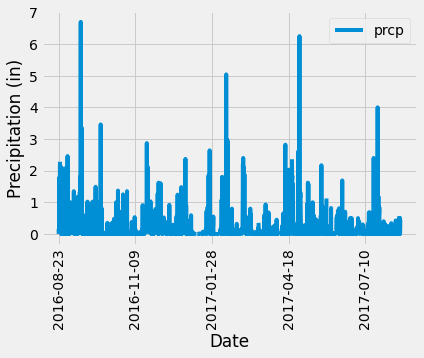

In [11]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query).set_index('date')

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.ylabel('Precipitation (in)')
plt.xlabel('Date')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
num_stations = len(session.query(Station).all())
print(f'There are {num_stations} stations in the area.')

There are 9 stations in the area.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query = session.query(Station.station, Station.name, func.count(Measurement.date)).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station = query[0]
print(f'The most active sation is {query[0][1]}, with {query[0][2]} observations in the last year.')

The most active sation is WAIHEE 837.5, HI US, with 2772 observations in the last year.


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == station[0]).first()
print(f'Over the last year at {station[1]}, the\nMinimum Temp was {query[0]}\u00b0F,\nMaximun Temp was {query[1]}\u00b0F and\nThe average Temp was {round(query[2],1)}\u00b0F.')

Over the last year at WAIHEE 837.5, HI US, the
Minimum Temp was 54.0°F,
Maximun Temp was 85.0°F and
The average Temp was 71.7°F.


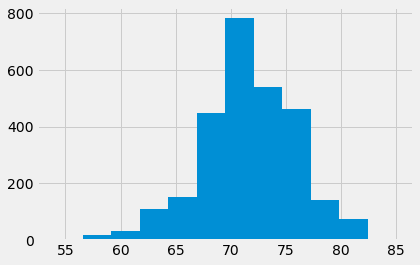

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(Measurement.tobs).filter(Measurement.station==station[0] and Measurement.date >= query_date).all()

values = []
for value in query:
    values.append(value[0])
    
plt.hist(values, bins=12)
plt.show()

# Close session

In [17]:
# Close Session
session.close()